In [1]:
#import Neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

#import required accuracy metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Census Income Project

#### Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [2]:
#Lets load the dataset with given URL
df = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [3]:
#Lets check the null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

* Great we don't have any null values in our dataset

In [4]:
#lets check the info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Here in dataset I observed __'?'__ sign, we will replace it with suitable values.

In [5]:
#Lets chcek which columns having ?
for i in df.columns:
        print(df[i].value_counts())
        print('-----------------------------------')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
-----------------------------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
-----------------------------------
203488    13
123011    13
164190    13
121124    12
148995    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: Fnlwgt, Length: 21647, dtype: int64
-----------------------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate  

* we can see the columns Workclass,Occupation and Native_country having __?__ values.

In [6]:
#We will replace all '?' with most frequently occuring values of that column because these are categorical columns
df['Workclass'] = df.Workclass.str.replace('?', 'Private')
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

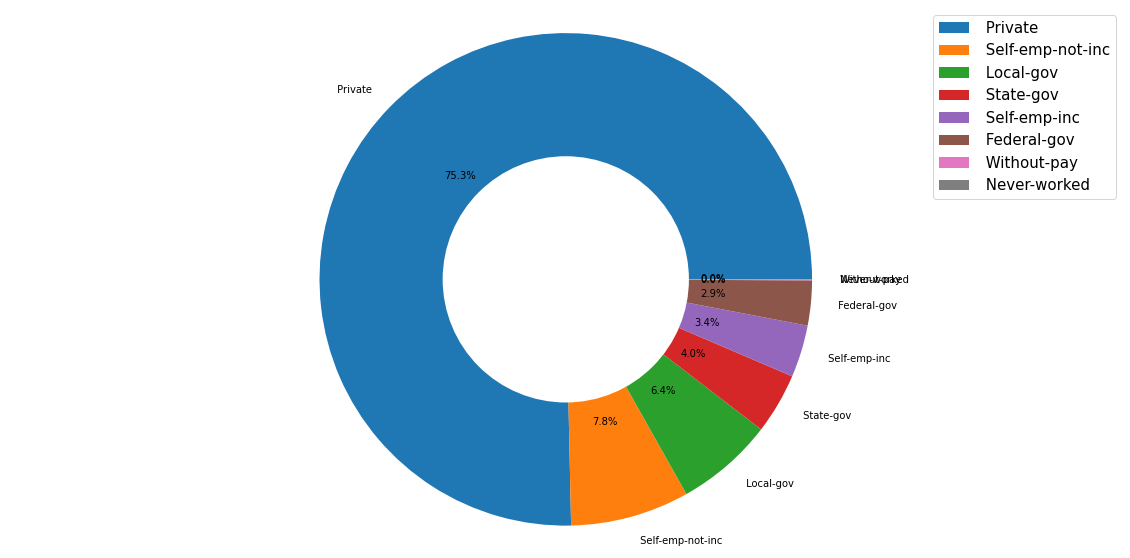

In [7]:
#Lets have a look on Workclass, how it is distributed
plt.figure(figsize=(20, 10))
plt.pie( df["Workclass"].value_counts().values, labels = df["Workclass"].value_counts().index, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

- We can see 75.3% of Workclass contains entries named __private__

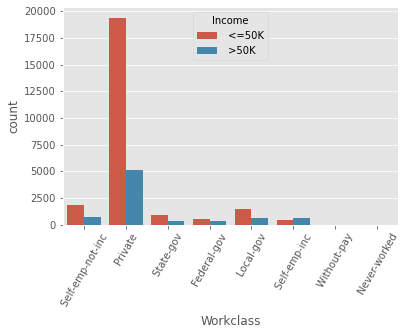

In [8]:
#lets see the relation between workclass and income
plt.style.use('ggplot')
sns.countplot(x = "Workclass", hue = "Income", data = df)
plt.xticks(rotation = 60)
plt.show()

* This will tell us the ratio of income of __>50k__ is more than __1__ only in one case that is self-emp-inc, in other cases ratio is less than 1 or very less.

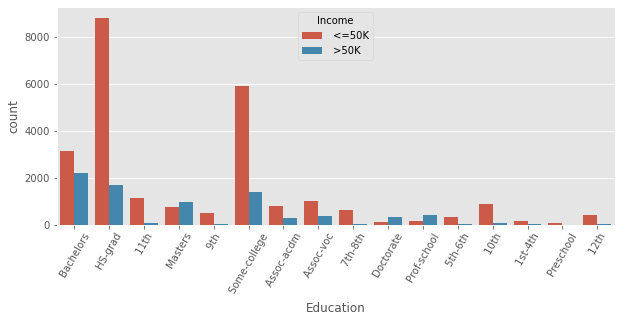

In [9]:
#lets see the relation between workclass and income
plt.style.use('ggplot')
plt.figure(figsize=(10, 4))
sns.countplot(x = "Education", hue = "Income", data = df)
plt.xticks(rotation = 60)
plt.show()

* we can observe that more number of people are from HS-grad, same-college, and bachelors categories.
* The ratio of having income __>50K__ is more than __1__ in case of Doctorates, prof-school and masters, rest all categories has less than __ ratio

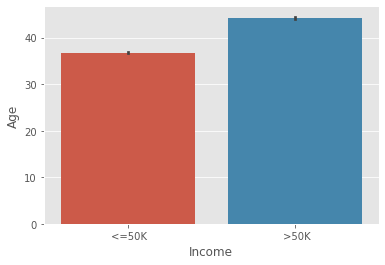

In [10]:
#lets see how Age affects Income
sns.barplot(x = "Income", y = "Age", data = df)
plt.show()

* We can observe that the most of the people over age of __37__ are having income __>50__

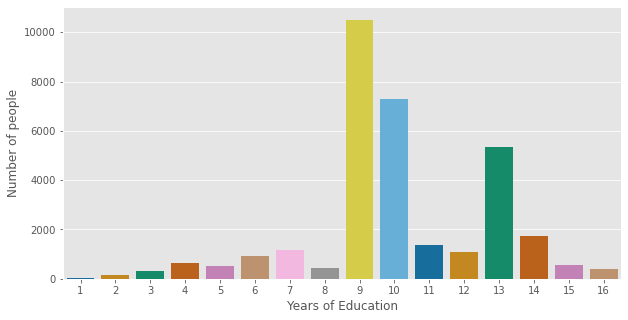

In [11]:
#Lets see the distribution of Education_num
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(df["Education_num"].value_counts().index, df["Education_num"].value_counts().values, palette='colorblind')
plt.xlabel('Years of Education')
plt.ylabel('Number of people')
plt.show()

* Here we can see maximum people belongs to 9, 10 and 13 years of education catrgory, and very less population belongs to 1,2 and 3 years of education category.

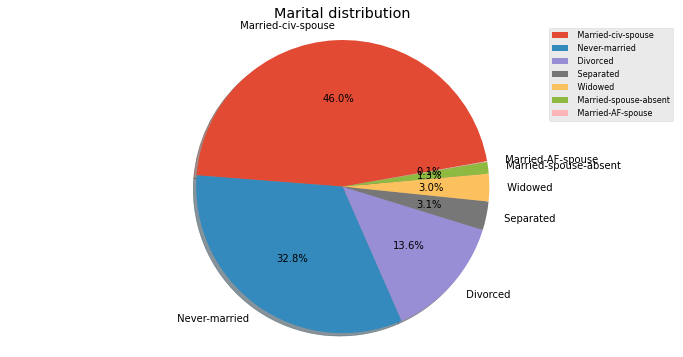

In [12]:
# Creating a pie chart for 'Marital status'
marital = df['Marital_status'].value_counts()
plt.figure(figsize=(12, 6))
plt.pie(marital.values, labels = marital.index, startangle=10, shadow = True, autopct='%1.1f%%')
plt.title('Marital distribution')
plt.legend()
plt.legend(prop={'size': 8})
plt.axis('equal')
plt.show()

* We can see about 92% of people are belongs to Married_civ_spouse, Never_married and Divorced categories.
* Very less population is belongs to Married_AF_spouse category, which is of only about 0.1%

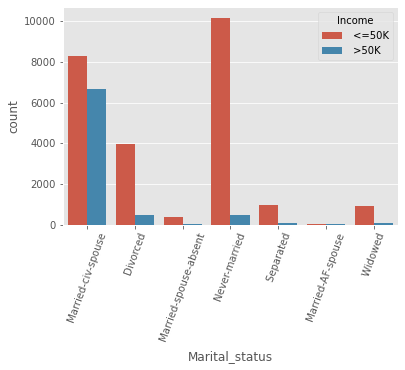

In [13]:
#Lets see How Marital_ststus affects Income
plt.style.use('ggplot')
sns.countplot(x = "Marital_status", hue = "Income", data = df)
plt.xticks(rotation = 70)
plt.show()

* This will tell us that the ratio of income __>50K__ is more in the case of Married_civ_spouse compared to othwr cases.

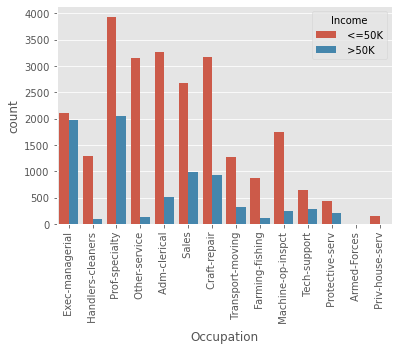

In [14]:
#Lets check Occupation vs income
plt.style.use('ggplot')
sns.countplot(x = "Occupation", hue = "Income", data = df)
plt.xticks(rotation = 90)
plt.show()

* People working with Exec-managerial & prof-speciality positions has higher income ratio that is >50k compared to other classes.
* people who works as Armed-forces and priv-house-serv has income mostly below 50k.

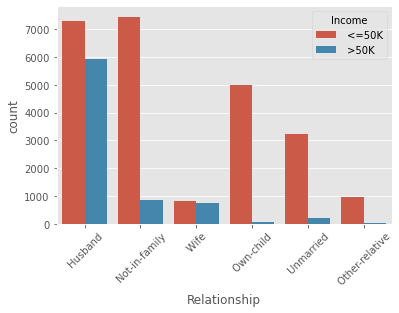

In [15]:
#Lets see the relation between Relationship and Income
sns.countplot(x = "Relationship", hue = "Income", data = df)
plt.xticks(rotation = 45)
plt.show()

* people with relationship of Husband and Wife giving higher ratio of Income getting __>50K__. In other cases this ratio is too low.

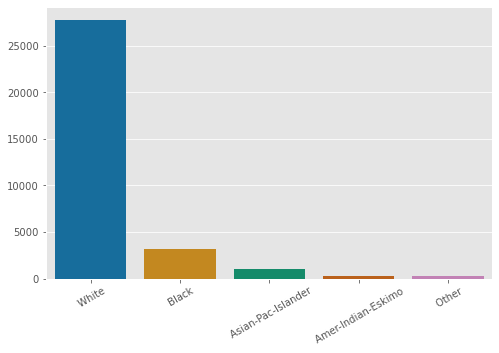

In [16]:
#Lets see the distribution of Education_num
plt.figure(figsize=(8, 5))
sns.barplot(df["Race"].value_counts().index, df["Race"].value_counts().values, palette='colorblind')
plt.xticks(rotation = 30)
plt.show()

* We can say most of the people are white.

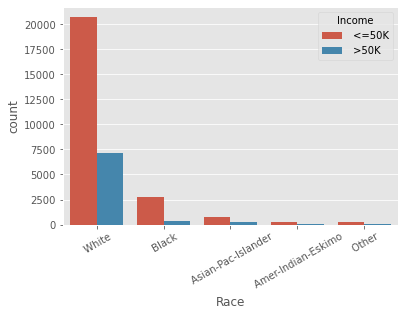

In [17]:
#lets check how Race affects Income
sns.countplot(x = "Race", hue = "Income", data = df)
plt.xticks(rotation = 30)
plt.show()

* white people and Asian-Pac-Islander are showing more ratio of having income __>50K__

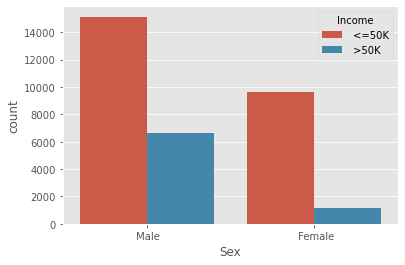

In [18]:
#Lets see distribution of income across sex
sns.countplot(x = "Sex", hue = "Income", data = df)
plt.show()

* This plot will tell us there are more number of males than females.
* And the ratio of having income >50K is also high in case of Males compared to females.

In [19]:
#Lets check the entries in Capital_gain column
df["Capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1639         1
5060         1
6097         1
1455         1
7978         1
Name: Capital_gain, Length: 119, dtype: int64

In [20]:
#we will replace 0 in Capital_gain column with mean of this column
df["Capital_gain"].replace(0, df["Capital_gain"].mean(),inplace = True)

In [21]:
#Lets check the entries in Capital_loss column
df["Capital_loss"].value_counts()

0       31041
1902      202
1977      168
1887      159
1485       51
        ...  
2467        1
1539        1
155         1
2282        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [22]:
#Here in Capital_loss column there is 95.33% of entries are 0, so we will drop this column
df.drop(columns = "Capital_loss", inplace = True)

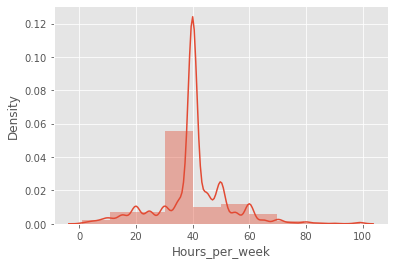

In [23]:
#Lets have a look on how destribution of Hours_per_week 
sns.distplot(df["Hours_per_week"], bins = 10)
plt.show()

* This will tell us that most of the population works for about 40 hours per week.

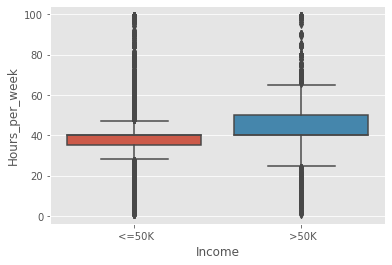

In [24]:
#Lets see how Hours_per_week affects Income
sns.boxplot(x = "Income", y = "Hours_per_week", data = df)
plt.show()

* We can say that the people who are working for more than 40 hours per week are mostly giving income >50K.

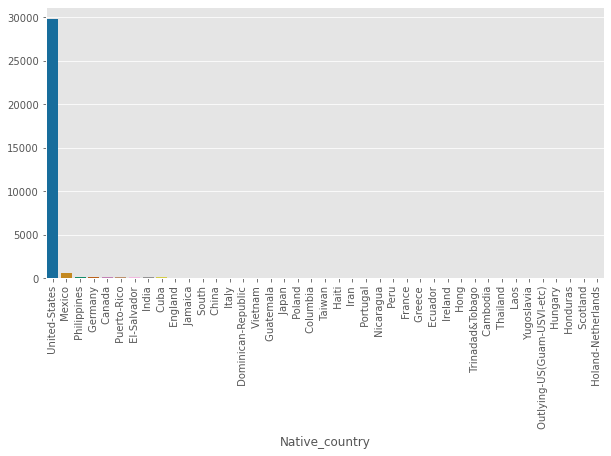

In [25]:
#lets see how Native_country is distributed
plt.figure(figsize=(10, 5))
sns.barplot(df["Native_country"].value_counts().index, df["Native_country"].value_counts().values, palette='colorblind')
plt.xlabel('Native_country')
plt.xticks(rotation = 90)
plt.show()

* we can see by this plot arround 90% of entries in this column are United_states

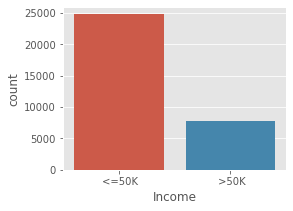

In [26]:
#lets have a look on our target variable
plt.figure(figsize=(4, 3))
sns.countplot(df["Income"])
plt.show()

* We can say that there are more number people with less than 50K income.

In [27]:
#lets replace label column(Income) into binary codes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Income'] = le.fit_transform(df['Income'])

### Heat-Map to check correlation

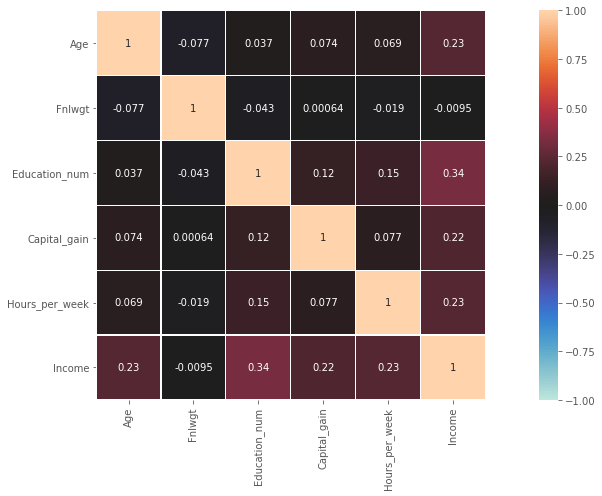

In [28]:
#Lets plot heatmap to check correlation among differnt features and label
df_corr = df.corr()
plt.figure(figsize = (15,7))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g', linewidths=0.1)
plt.tight_layout()

* By seeing heatmap we can say that the column Flnwgt is having very less coefficient of correlation with target variable, but we don't want to loose information so I am not dropping this column.
* Rest all features are also not in strongly relation with target variable which is below 0.40.
* Education_num means years of education is having good relation with target variable compared to other features.

In [29]:
#Lets have a look on description of our dataset
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Hours_per_week,Income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,2065.506304,40.437469,0.240817
std,13.640642,1.055498e+05,2.572709,7245.938132,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,114.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,1077.615172,40.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,1077.615172,40.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,1077.615172,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,99.000000,1.000000


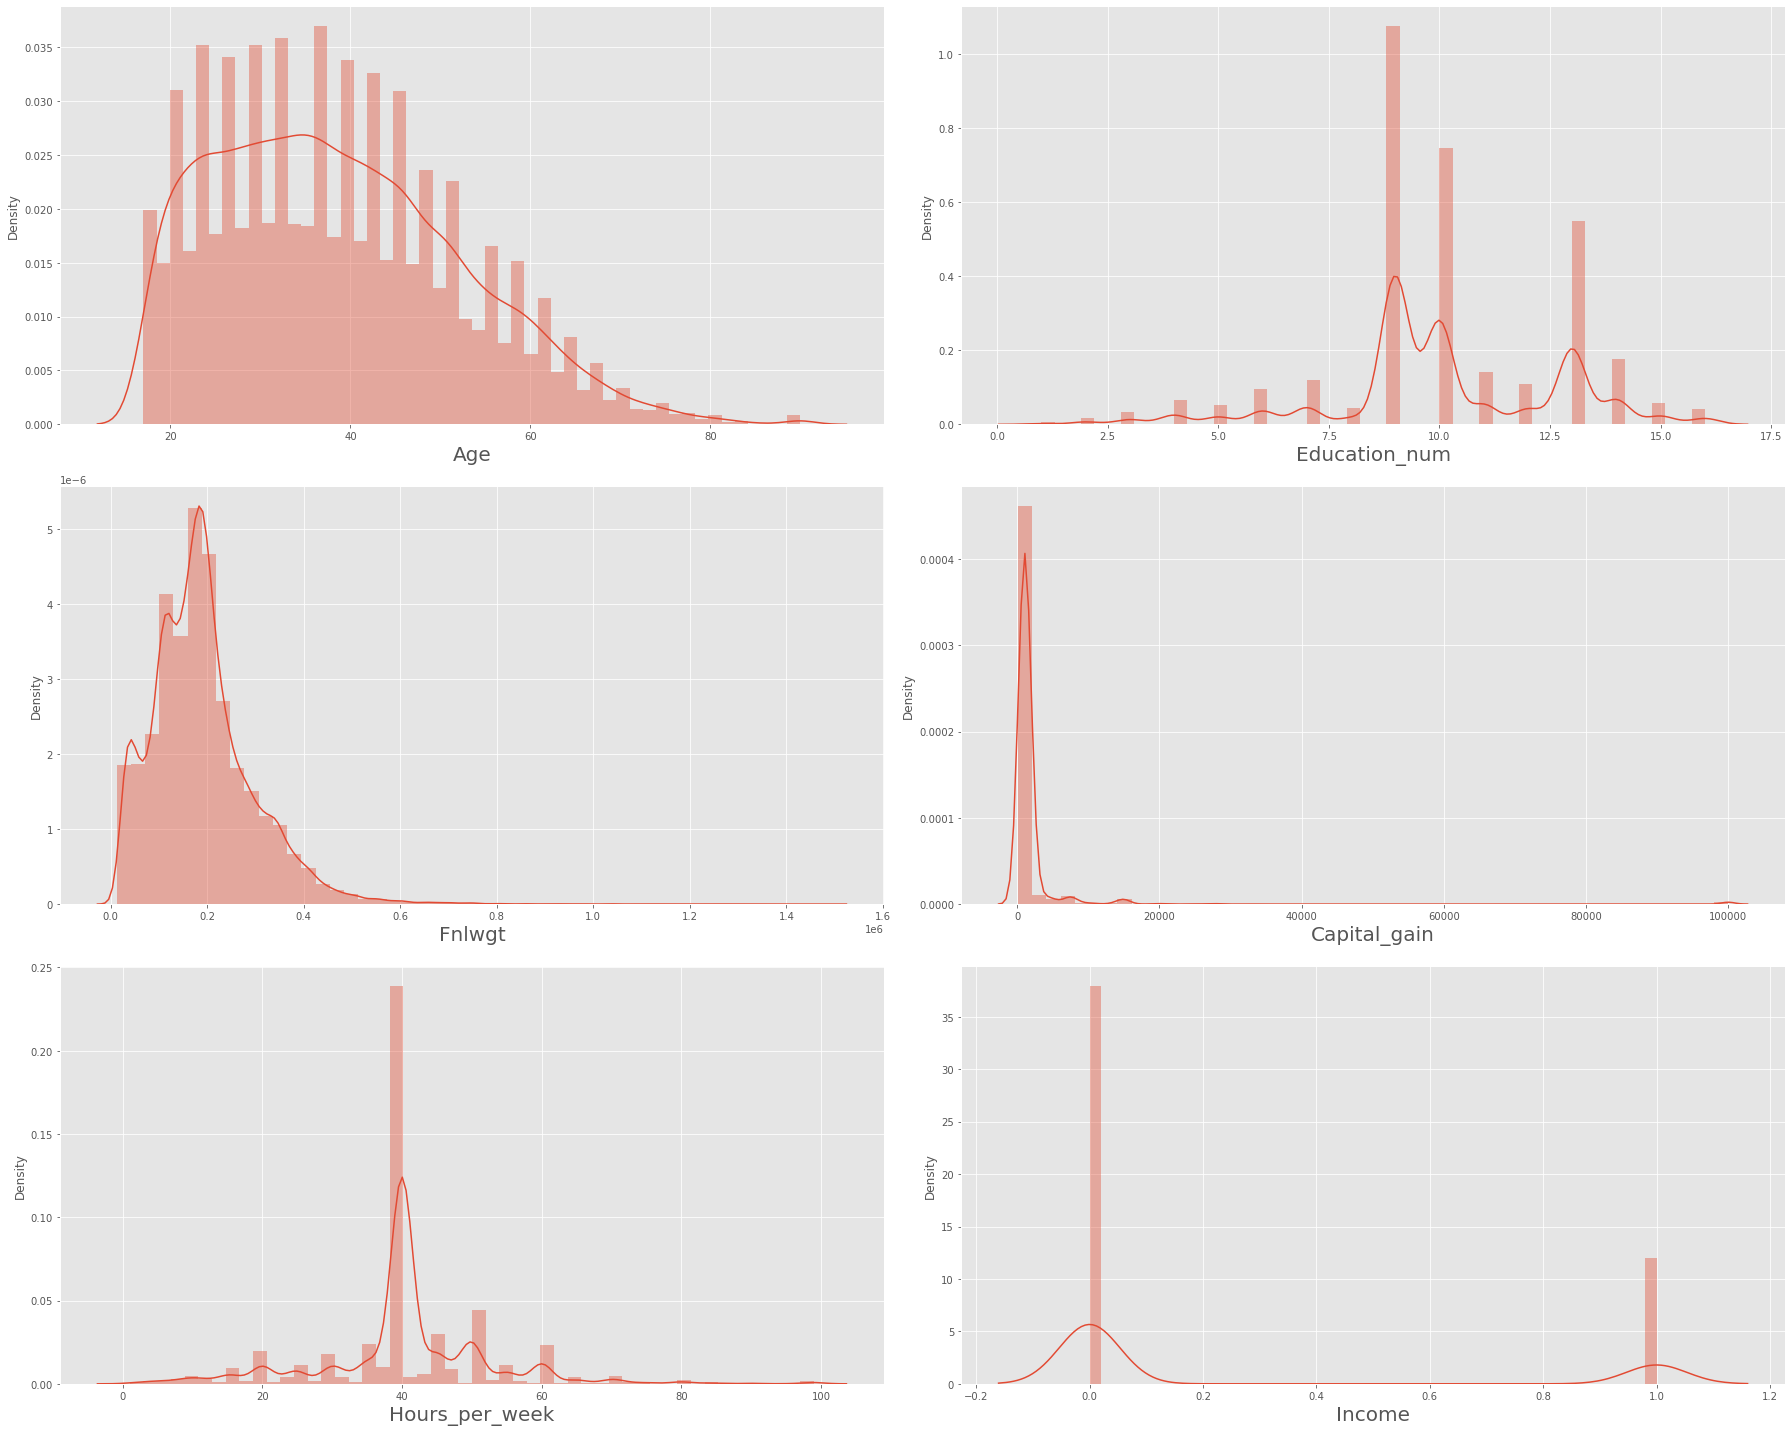

In [30]:
#Visualizing how data is distributed
plt.figure(figsize = (25,20))
plotnumber = 1
columns = ["Age","Education_num","Fnlwgt","Capital_gain","Hours_per_week","Income"]
for column in df[columns]:
    if plotnumber <=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

* It seems like there are much outliers presents in dataset.

In [31]:
#lets see skewness 
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      12.248734
Hours_per_week     0.227636
Income             1.212383
dtype: float64

* skewness is present in 3 features, we will remove outliers and then check skewness again

In [32]:
#remove outliers by applying zscore method
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Age','Education_num','Fnlwgt','Capital_gain','Hours_per_week']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.reset_index(inplace = True)

In [33]:
df

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,1077.615172,13,United-States,0
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,1077.615172,40,United-States,0
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,1077.615172,40,United-States,0
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,1077.615172,40,Cuba,0
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,1077.615172,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31250,32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,1077.615172,38,United-States,0
31251,32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,1077.615172,40,United-States,1
31252,32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,1077.615172,40,United-States,0
31253,32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,1077.615172,20,United-States,0


* By removing outliers we loose around 4% of data which is acceptable.

In [34]:
#drop index column
df.drop(columns = "index", inplace = True)

In [35]:
#First devide our data into label and features
x = df.drop(columns = "Income")
y = df["Income"]

In [36]:
#lets check skewness again
x.skew()
#Now skewness is reduced compared to earlier, we will try to reduce it more by treating it

Age               0.476846
Fnlwgt            0.633372
Education_num    -0.165837
Capital_gain      5.449847
Hours_per_week   -0.348974
dtype: float64

In [37]:
#Lets treat the skewness
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.cbrt(x[index])
        if x.skew().loc[index]<-0.5:
            x[index]=np.square(x[index])

In [38]:
#Lets check the skewnes agin
x.skew()

Age               0.476846
Fnlwgt           -0.378099
Education_num    -0.165837
Capital_gain      4.283082
Hours_per_week   -0.348974
dtype: float64

Great now we are having skewness only in one column.

In [39]:
#lets convert categorical data into numeric values, using label encoder
leb_enc = LabelEncoder()
for i in x.columns:
    if x[i].dtypes == "object":
        x[i] = leb_enc.fit_transform(x[i])

In [40]:
#lets check the label count
y.value_counts()

0    23848
1     7407
Name: Income, dtype: int64

* By looking at the value counts of our target variable, we can say there will be problem of imbalance. So we will go for oversampling using smote.

In [41]:
#lets do oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over,y_over = SM.fit_resample(x,y)

In [42]:
x_over

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country
0,50,5,43.675121,8,13,2,3,0,4,1,10.252298,13,38
1,38,3,59.967204,10,9,0,5,1,4,1,10.252298,40,38
2,53,3,61.685627,1,7,2,5,0,2,1,10.252298,40,38
3,28,3,69.686283,8,13,2,9,5,2,0,10.252298,40,4
4,37,3,65.776255,11,14,2,3,5,4,0,10.252298,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,40,3,36.372582,13,10,2,11,0,4,1,10.252298,36,38
47692,60,3,54.987972,11,14,2,3,0,4,0,10.813554,40,38
47693,44,3,57.430161,11,14,2,3,0,4,1,10.252298,50,38
47694,61,0,52.873228,13,10,2,1,0,4,1,10.252298,40,38


In [43]:
#lets seperate numerical data
num_data = pd.DataFrame(x_over,columns = ['Age','Fnlwgt','Education_num','Capital_gain','Hours_per_week'])

In [44]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
x_num = scaler.fit_transform(num_data)
x_num = pd.DataFrame(x_num,columns=num_data.columns)

In [45]:
cat_data = x_over.drop(columns = ['Age','Fnlwgt','Education_num','Capital_gain','Hours_per_week'] )

In [46]:
#Lets join both categorical data and numerical data of our features
X = x_num.join(cat_data)
X

,Age,Fnlwgt,Education_num,Capital_gain,Hours_per_week,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country
0,0.817933,-1.258376,1.064138,-0.343581,-2.792876,5,8,2,3,0,4,1,38
1,-0.167965,0.628176,-0.634622,-0.343581,-0.146059,3,10,0,5,1,4,1,38
2,1.064407,0.840748,-1.484002,-0.343581,-0.146059,3,1,2,5,0,2,1,38
3,-0.989546,1.516453,1.064138,-0.343581,-0.146059,3,8,2,9,5,2,0,4
4,-0.250123,1.237571,1.488828,-0.343581,-0.146059,3,11,2,3,5,4,0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,1.228723,1.677393,1.913518,-0.343581,-0.146059,4,9,2,9,0,4,1,24
47692,0.489300,-0.129725,1.064138,-0.343581,-0.048029,3,8,2,10,0,4,1,38
47693,0.571458,0.381759,0.214758,-0.343581,-0.146059,3,12,2,9,0,4,1,38
47694,0.571458,1.256739,1.913518,2.939207,1.324395,3,9,2,8,0,4,1,38


## Finding best random state

In [47]:
#Lets find the best random state using LogisticRegression
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_rs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y_over,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.7771720899027172 on Random State 63


In [48]:
#lets split our data into train and test parts with best random_state
x_train,x_test,y_train,y_test = train_test_split(X, y_over, test_size = 0.25, random_state = max_rs )

### Getting results for different algorithms

In [49]:
#Lets check the model with LogisticRegression
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,predlr)*100}%")
print(f"roc_auc_score: {roc_auc_score(y_test,predlr)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,predlr)}")

Accuracy Score: 77.71720899027173%
roc_auc_score: 77.73013547210306%
---------------------------------------------------
Confusion Matrix : 
 [[4546 1455]
 [1202 4721]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      6001
           1       0.76      0.80      0.78      5923

    accuracy                           0.78     11924
   macro avg       0.78      0.78      0.78     11924
weighted avg       0.78      0.78      0.78     11924



In [50]:
#model with DecesionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_dt)*100}%")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_dt)*100}%")
print("---------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_dt)}")

Accuracy Score: 84.96309963099631%
roc_auc_score: 84.96426660613686%
---------------------------------------------------
Confusion Matrix : 
 [[5088  913]
 [ 880 5043]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      6001
           1       0.85      0.85      0.85      5923

    accuracy                           0.85     11924
   macro avg       0.85      0.85      0.85     11924
weighted avg       0.85      0.85      0.85     11924



In [51]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_rf)*100}%")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_rf)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_rf)}")

Accuracy Score: 88.69506876886952%
roc_auc_score: 88.69601141100829%
---------------------------------------------------
Confusion Matrix : 
 [[5314  687]
 [ 661 5262]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      6001
           1       0.88      0.89      0.89      5923

    accuracy                           0.89     11924
   macro avg       0.89      0.89      0.89     11924
weighted avg       0.89      0.89      0.89     11924



In [52]:
#model with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn = kn.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_kn)*100}%")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_kn)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_kn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_kn)}")

Accuracy Score: 85.21469305602147%
roc_auc_score: 85.22069862687918%
---------------------------------------------------
Confusion Matrix : 
 [[5059  942]
 [ 821 5102]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      6001
           1       0.84      0.86      0.85      5923

    accuracy                           0.85     11924
   macro avg       0.85      0.85      0.85     11924
weighted avg       0.85      0.85      0.85     11924



In [53]:
#lets check with XGBClassifier model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
print("------------------------------------------------------------------------")

print(f"Accuracy Score: {accuracy_score(y_test,pred_xgb)*100}%")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_xgb)*100}%")
print("--------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_xgb)}")

[17:04:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
------------------------------------------------------------------------
Accuracy Score: 89.30727943643073%
roc_auc_score: 89.30742535088207%
--------------------------------------------------------
Confusion Matrix : 
 [[5358  643]
 [ 632 5291]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      6001
           1       0.89      0.89      0.89      5923

    accuracy                           0.89     11924
   macro avg       0.89      0.89      0.89     11924
weighted avg       0.89      0.89      0.89     11924



## Cross-Validation

In [54]:
#Let's check cross validation score for all algorithms
#for LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
k_f =KFold(n_splits = 3, shuffle = True)
k_f
scores = cross_val_score(LR, X, y_over, cv = 5,scoring = "accuracy" )
print("Cross validation score of Logistic Regression model is :", scores.mean())

Cross validation score of Logistic Regression model is : 0.7667105030369642


In [55]:
#Let's check cross validation score for DecisionTreeClassifier
scores = cross_val_score(dt, X, y_over, cv=5, scoring = "accuracy")
print("Cross validation score of DecisionTreeClassifier model is :", scores.mean())

Cross validation score of DecisionTreeClassifier model is : 0.8426932599108197


In [56]:
#Let's check cross validation score for RandomForestClassifier
scores = cross_val_score(rf, X, y_over, cv=5, scoring = "accuracy")
print("Cross validation score of RandomForestClassifier model is :", scores.mean())

Cross validation score of RandomForestClassifier model is : 0.8801809211791468


In [57]:
#Let's check cross validation score for KNeighborsClassifier
scores = cross_val_score(kn, X, y_over, cv=5, scoring = "accuracy")
print("Cross validation score of KNeighborsClassifier model is :", scores.mean())

Cross validation score of KNeighborsClassifier model is : 0.8447684524943722


In [58]:
#Let's check cross validation score for XGBClassifier
scores = cross_val_score(xgb, X, y_over, cv=5, scoring = "accuracy")
print('------------------------------------------------------------------')
print("Cross validation score of XGBClassifier model is :", scores.mean())

[17:05:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:05:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:05:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:06:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### Difference in accuracy score and cross validation score for different algorithms
* LogisticRegression = 1.04%
* DecisionTreeClassifier = 0.70%
* RandomForestClassifier = 0.68%
* KNeighborsClassifier = 0.74%
* XGBClassifier = 1.26%

• from above observations we can say the RandomForestClassifier is giving least difference. So we can choose this algorithm for hyperparameter tuning. 


## ROC & AUC Curve

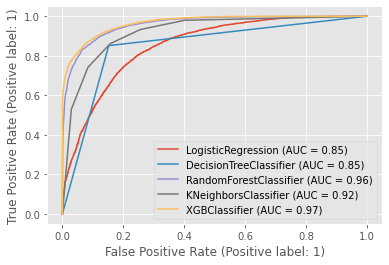

In [59]:
#Lets plot roc curve and check auc and performance of all algorithms
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(dt, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(kn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(xgb, x_test, y_test, ax = disp.ax_)

plt.legend(prop={"size" :10} ,loc = 'lower right')
plt.show()

* RandomForestClassifier and XGBclassifier is giving good performance compared to other algorithms, based on cross validation score and looking at model performance we will select RandomForestClassifier as a best suitable algorithm as random forest has less difference than xgbclassifier.  

## Hyperparameter Tuning

In [60]:
#lets selects different parameters for tuning
grid_params = {
                'criterion':['gini','entropy'],
                'max_depth': [12,15,20],
               'max_features':['aoto','sqrt','log2'],
                'n_estimators':[500,700,900]
                }

In [61]:
#train the model with given parameters using GridSearchCV
GCV =  GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [12, 15, 20],
                         'max_features': ['aoto', 'sqrt', 'log2'],
                         'n_estimators': [500, 700, 900]})

In [62]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 700}

In [63]:
#Let's train and test our model using best parameters
model = RandomForestClassifier( criterion = 'gini', max_depth=20, max_features = 'sqrt',  n_estimators=700)

model.fit(x_train,y_train)
pred = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
print("---------------------------------------------------")

print(f"roc_auc_score: {roc_auc_score(y_test,pred_rf)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
print("---------------------------------------------------")

print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
print("---------------------------------------------------")


Accuracy Score: 88.92988929889299%
---------------------------------------------------
roc_auc_score: 88.69601141100829%
---------------------------------------------------
Confusion Matrix : 
 [[5294  707]
 [ 613 5310]]

---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      6001
           1       0.88      0.90      0.89      5923

    accuracy                           0.89     11924
   macro avg       0.89      0.89      0.89     11924
weighted avg       0.89      0.89      0.89     11924

---------------------------------------------------


- __ROC curve for final model__

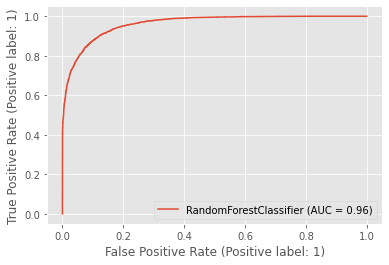

In [64]:
#Lets check our model performance after hyperparameter tuning by plottin 
plot_roc_curve(model, x_test, y_test)
plt.show()

Great we have improved model accuracy score as well as performance(AUC) by doing hyperparameter tuning.

## Model Saving

In [65]:
import joblib
joblib.dump(model,"Census_Income_prediction.pkl")

['Census_Income_prediction.pkl']